### Anomaly Detection
* What are Outliers ?
* Statistical Methods for Univariate Data
* Using Gaussian Mixture Models
* Isolation Forest
* Local Outlier Factor

### Outliers
* New data which doesn't belong to general trend (or distribution) of entire data are known as outliers.
* Data belonging to general trend are known as inliners.
* Learning models are impacted by presence of outliers.
* Anomaly detection is another use of outlier detection in which we find out unusual behaviour.
* Data which were detected outliers can be deleted from complete dataset.
* Outliers can also be marked before using them in learning methods

### Statistical Methods for Univariate Data
* Using Standard Deviation Method - zscore
* Using Interquartile Range Method - IRQ

##### Using Standard Deviation Method
* If univariate data follows Gaussian Distribution, we can use standard deviation to figure out where our data lies

In [1]:
import numpy as np

In [2]:
data = np.random.normal(size=1000)

* Adding More Outliers

In [3]:
data[-5:] = [3.5,3.6,4,3.56,4.2]

In [4]:
from scipy.stats import zscore

* Detecting Outliers

In [5]:
data[np.abs(zscore(data)) > 3]

array([3.5 , 3.6 , 4.  , 3.56, 4.2 ])

##### Using Interquartile Range
* For univariate data not following Gaussian Distribution IQR is a way to detect outliers

In [6]:
from scipy.stats import iqr

In [7]:
data = np.random.normal(size=1000)

In [8]:
data[-5:]=[-2,9,11,-3,-21]

In [9]:
iqr_value = iqr(data)

In [10]:
lower_threshold = np.percentile(data,25) - iqr_value*1.5

In [11]:
upper_threshold = np.percentile(data,75) + iqr_value*1.5

In [12]:
upper_threshold

2.5752167538800417

In [13]:
lower_threshold

-2.5312918129209305

In [14]:
data[np.where(data < lower_threshold)]

array([ -2.87341325,  -2.6094222 ,  -3.11868953,  -3.        ,
       -21.        ])

In [15]:
data[np.where(data > upper_threshold)]

array([ 3.26030901,  2.85240439,  2.76691384,  2.69371601,  9.        ,
       11.        ])

### Using Gaussian Mixture Models

In [16]:
# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
C2 = np.array([[1., -0.1], [2.7, .2]])
#X = np.r_[np.dot(np.random.randn(n_samples, 2), C)]
          #.7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),np.dot(np.random.randn(n_samples, 2), C2)]

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
X[-5:] = [[4,-1],[4.1,-1.1],[3.9,-1],[4.0,-1.2],[4.0,-1.3]]

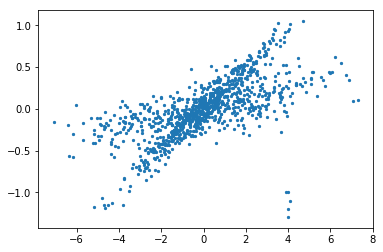

In [19]:
plt.scatter(X[:,0], X[:,1],s=5)

In [20]:
from sklearn.mixture import GaussianMixture

In [21]:
gmm = GaussianMixture(n_components=3)

In [22]:
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [23]:
pred = gmm.predict(X)

In [24]:
pred[:50]

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

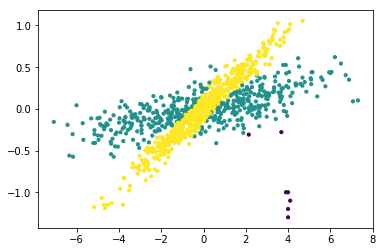

In [25]:
plt.scatter(X[:,0], X[:,1],s=10,c=pred)

### Fitting Elliptical Envelope
* The assumption here is, regular data comes from known distribution ( Gaussion distribution )
* Inliner location & variance will be calculated using `Mahalanobis distances` which is less impacted by outliers.
* Calculate robust covariance fit of the data.

In [26]:
from sklearn.datasets import make_blobs
X,_ = make_blobs(n_features=2, centers=2, cluster_std=2.5, n_samples=1000)

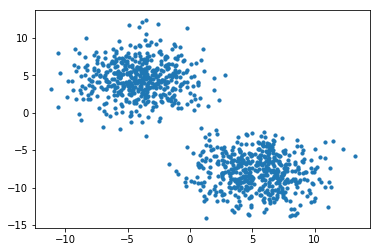

In [27]:
plt.scatter(X[:,0], X[:,1],s=10)

In [28]:
from sklearn.covariance import EllipticEnvelope

In [29]:
ev = EllipticEnvelope(contamination=.1)

In [30]:
ev.fit(X)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

In [31]:
cluster = ev.predict(X)

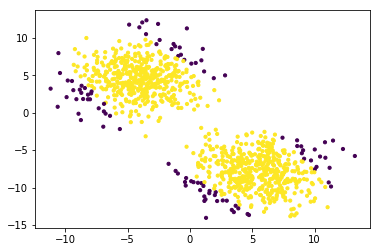

In [32]:
plt.scatter(X[:,0], X[:,1],s=10,c=cluster)

### Isolation Forest
* Based on RandomForest
* Useful in detecting outliers in high dimension datasets.
* This algorithm randomly selects a feature & splits further.
* Random partitioning produces shorter part for anomolies.
* When a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

In [33]:
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [34]:
from sklearn.ensemble import IsolationForest

In [35]:
data = np.r_[X_train,X_test,X_outliers]

In [36]:
iso = IsolationForest(behaviour='new', contamination='auto')

In [37]:
iso.fit(data)

IsolationForest(behaviour='new', bootstrap=False, contamination='auto',
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=None, verbose=0)

In [38]:
pred = iso.predict(data)

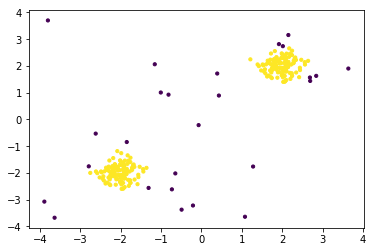

In [39]:
plt.scatter(data[:,0], data[:,1],s=10,c=pred)

### Local Outlier Factor
* Based on nearest neighbours
* Suited for moderately high dimension datasets
* LOF computes a score reflecting degree of abnormility of a data.
* LOF Calculation
  - Local density is calculated from k-nearest neighbors.
  - LOF of each data is equal to the ratio of the average local density of his k-nearest neighbors, and its own local density.
  - An abnormal data is expected to have smaller local density.
* LOF tells you not only how outlier the data is but how outlier is it with respect to all data

In [40]:
from sklearn.neighbors import LocalOutlierFactor

In [41]:
lof = LocalOutlierFactor(n_neighbors=25,contamination=.1)

In [42]:
pred = lof.fit_predict(data)

In [43]:
s = np.abs(lof.negative_outlier_factor_)

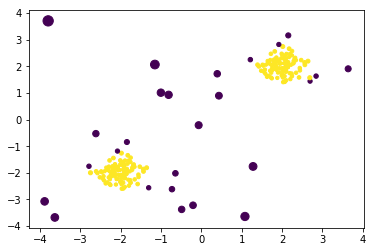

In [44]:
plt.scatter(data[:,0], data[:,1],s=s*10,c=pred)

### Outlier Detection using DBSCAN
* DBSCAN is a clustering method based on density
* Groups data which are closer to each other.
* Doesn't use distance vector calculation method
* Data not close enough to any cluster is not assigned any cluster & these can be anomalies

In [45]:
from sklearn.cluster import DBSCAN

In [46]:
dbscan = DBSCAN(eps=.3)

In [47]:
dbscan.fit(data)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

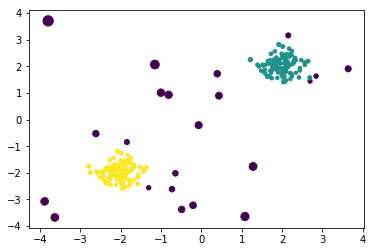

In [48]:
plt.scatter(data[:,0], data[:,1],s=s*10,c=dbscan.labels_)